# Assignment 1 - Exercise Setup
This notebook contains the necessary code setup for the accompanying exercises. 

# 1. Coordinate Descent

In [ ]:
import numpy as np
def argmin_x1(x):
    return (3 * x[1] + 2 * x[2] - 1) / 2
    """Your code here"""

def argmin_x2(x):
    return (x[0] + 2 * x[2] + 5) / 6
    """Your code here"""

def argmin_x3(x):
    return (3 * x[1] + x[0] - 4) / 4
    """Your code here"""

def f(x):
    return np.exp(x[0] - 3*x[1] + 3) + np.exp( 3*x[1] - 2*x[2] - 2) + np.exp(2*x[2] - x[0] + 2)
    """Your code here"""

def coordinate_descent(f, argmin, x0, max_iter=100, verbose=False):
    """Your code here"""
    x_t = x0.copy()
    #argmin= np.array(x0, dtype=float)
    history = [x0.copy(), f(x0)]
    for i in range(max_iter):
        x_t[0] = argmin[0](x_t)
        x_t[1] = argmin[1](x_t)
        x_t[2] = argmin[2](x_t)
        # And here
        history.append([x_t.copy(), f(x_t)])
        pass
    return x_t, f(x_t), history

x_t0 = np.array([4, 3, 2])

print("argmin_x1(x_to) = ", argmin_x1(x_t0))
print("argmin_x2(x_to) = ", argmin_x2(x_t0))
print("argmin_x3(x_to) = ", argmin_x3(x_t0))

X_t0 = np.array([1, 20, 5])
argmin = np.array([argmin_x1,argmin_x2,argmin_x3])
print(coordinate_descent(f, argmin, X_t0))

# 2. Gradient Descent

Descent calculation using constant step size: 

Path taken by gradient descent using the constant method: [(4, -5), (3.956, -4.56), (3.919077652736, -4.236427168), (3.8874207178866147, -3.9847510915255904), (3.859910094289488, -3.781533726993982), (3.8357780947468303, -3.6129622061759727), (3.8144616853320827, -3.4702443761426887), (3.7955288711698167, -3.347459504382845), (3.7786374762397523, -3.2404443826995446), (3.763510076198185, -3.1461693975667253), (3.749917747839666, -3.062367312571772), (3.7376689880255984, -2.987301458132386), (3.726601844937992, -2.9196151045057963), (3.716578143439806, -2.8582302717890418), (3.707479131223143, -2.802277796980502), (3.699202121868874, -2.7510478073940616), (3.6916578576120815, -2.7039538907609626), (3.6847684044730316, -2.6605066837579043), (3.67846544948654, -2.6202940767575527), (3.67268890716995, -2.5829661553189904), (3.6673857675788746, -2.5482235909019955), (3.6625091357117476, -2.515808581944481), (3.6580174243168257, -2.485497706966

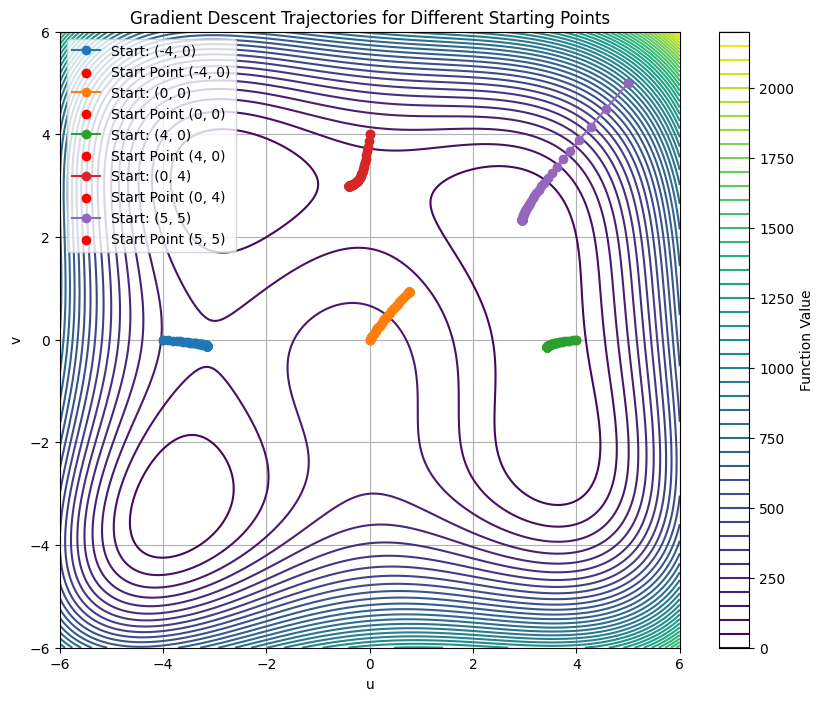

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# The outputs here are quite long, since I opted to print a lot of the information so it's easier to 
# parse for the ANS answer sheet; setting the output to be a scrollable element makes it easier to read.

def f(u,v):
    # Defines the function to be used in the gradient_descent method later.
    return (u**2+v-11)**2 + (u+v**2-7)**2

def grad_f(u,v):
    # Method that takes a point (u,v) and returns its gradient based on the 
    # function provided in the description of the exercise. Since we don't need this to be 
    # adaptable to other functions, we can hardcode the derived function here.
    
    df_du = 4 * u * (u**2+v-11) + 2 * (u + v**2 - 7)
    df_dv = 4 * v * (v**2 + u - 7) + 2 * (u**2 + v - 11)
    
    return [df_du, df_dv]


def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
    # Performs the update rule (step 3 of the Gradient Descent algorithm given in lecture.)
    # Eta values defined by three "eta..." methods below.
    u, v = u0, v0 
    uPath = [u]
    vPath = [v]
    
    # Just for readability.
    if eta == eta_multistep:
        path_method = "multistep"
    elif eta == eta_sqrt:
        path_method = "sqrt"
    elif eta == eta_const:
        path_method = "constant"
    
    for t in range(max_iter):
        # Since the step-size changes depending on which eta function is used:
        stepSize = eta(t,c=1e-3)
        grad_u, grad_v = grad_f(u, v)
        u -= stepSize * grad_u
        v -= stepSize * grad_v 
        uPath.append(u)
        vPath.append(v)
    
    # Path taken needs to be represented properly, not just listing the two arrays.
    # With zip, it interleaves the
    path = list(zip(uPath, vPath))
    
    # Same is true for the function values.
    values = [f(u_i, v_i) for u_i, v_i in path]

    print (f'Path taken by gradient descent using the {path_method} method: {path}')
    print(f'The final point reached by the descent is {path[-1]}')
    print(f'The final function value is {values[-1]}')
    print(f'The lowest value reached during training is {min(values)}\n')
    
    return path, values

def eta_const(t,c=1e-3) -> float:
    # Dealing with a constant - no need for calculations
    return c

def eta_sqrt(t,c=1e-3) -> float:
    return c / math.sqrt(t+1)

def eta_multistep(t, milestones=[30, 80, 100], c=1e-3, eta_init=1e-3) -> float:
    # Want to avoid doing X elif statements.
    milestonesPassed = sum(t>= m for m in milestones)
    
    if t < milestones[0]:
        return eta_init
    else: 
        return eta_init * (c**milestonesPassed)
    
startPoint = (4,-5)
print("Descent calculation using constant step size: \n")
descentConst = gradient_descent(f, grad_f, eta_const, startPoint[0], startPoint[1], 100)

print("Descent calculation using decreasing (inverse square root) step size: \n")
descentSqrt = gradient_descent(f, grad_f, eta_sqrt, startPoint[0], startPoint[1], 100)

print("Descent calculation using multi-step scheduling:\n")
descentMultistep = gradient_descent(f, grad_f, eta_multistep, startPoint[0], startPoint[1], 100)

# 2d - repeating with different starting points taken from the exercise descriptions.
# A little messy, but more readable than just having raw outputs.

startPointP1 = (-4, 0)
startPointP2 = (0, 0)
startPointP3 = (4, 0)
startPointP4 = (0, 4)
startPointP5 = (5, 5)

print('Descent calculation for P1:')
descentP1 = gradient_descent(f, grad_f, eta_const, startPointP1[0], startPointP1[1], 100) 

print('Descent calculation for P2:')
descentP2 = gradient_descent(f, grad_f, eta_const, startPointP2[0], startPointP2[1], 100)

print('Descent calculation for P3:')
descentP3 = gradient_descent(f, grad_f, eta_const, startPointP3[0], startPointP3[1], 100)

print('Descent calculation for P4:')
descentP4 = gradient_descent(f, grad_f, eta_const, startPointP4[0], startPointP4[1], 100)

print('Descent calculation for P5:')
descentP5 = gradient_descent(f, grad_f, eta_const, startPointP5[0], startPointP5[1], 100)

# Optional - plots of the gradient descent trajectories:
# Do note that because of the print statements in the gradient descent function,
# the output is quite long. If you want to just see the output, you can comment out the print statements.

def plot_descent_trajectories(f, paths, start_points, title="Gradient Descent Trajectories"):
    u = np.linspace(-6, 6, 400)
    v = np.linspace(-6, 6, 400)
    U, V = np.meshgrid(u, v)
    Z = f(U, V)

    plt.figure(figsize=(10, 8))
    plt.contour(U, V, Z, levels=50, cmap="viridis")
    plt.colorbar(label="Function Value")
    
    # Overlay the gradient descent paths
    for path, start_point in zip(paths, start_points):
        u_path, v_path = zip(*path)
        plt.plot(u_path, v_path, marker="o", label=f"Start: {start_point}")
        plt.scatter(*start_point, color="red", label=f"Start Point {start_point}")
    
    plt.title(title)
    plt.xlabel("u")
    plt.ylabel("v")
    plt.legend()
    plt.grid()
    plt.show()

start_points = [(-4, 0), (0, 0), (4, 0), (0, 4), (5, 5)]

# Perform gradient descent for each starting point
paths = []
for start_point in start_points:
    path, _ = gradient_descent(f, grad_f, eta_multistep, start_point[0], start_point[1], 100)
    paths.append(path)

# Plot the trajectories
plot_descent_trajectories(f, paths, start_points, title="Gradient Descent Trajectories for Different Starting Points")

# 3. Polynomial Regression

In [2]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
housing = fetch_california_housing(as_frame=True)

# The data is in a pandas DataFrame
df = housing.frame

# View the first few rows
df.head()
print(housing.DESCR)

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np

# Let's separate features and target for clarity
features = df.drop(columns=["MedHouseVal"])
target = df["MedHouseVal"]
# Standardize the features
# Your Code Here
scaled_features = StandardScaler().fit_transform(features)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(scaled_features)

p = poly_features.shape[1]
# Split the dataset (80% train, 20% validation) poly
X_train, X_val, y_train, y_val = train_test_split(poly_features, target, test_size=0.2, random_state=42)
# Split the dataset (80% train, 20% validation) lin
X_train_lin, X_val_lin, y_train_lin, y_val_lin = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

#Linear model
original_feature_names = features.columns.tolist()
linear_model_obj = LinearRegression()
linear_model_obj.fit(X_train_lin, y_train_lin)

idx_MedInc_linear = original_feature_names.index('MedInc')
idx_AveBedrms_linear = original_feature_names.index('AveBedrms')
idx_HouseAge_linear = original_feature_names.index('HouseAge')

beta_MedInc_linear = linear_model_obj.coef_[idx_MedInc_linear]
beta_AveBedrms_linear = linear_model_obj.coef_[idx_AveBedrms_linear]
beta_HouseAge_linear = linear_model_obj.coef_[idx_HouseAge_linear]

y_pred_linear_val = linear_model_obj.predict(X_val_lin)
mse_linear_val = mean_squared_error(y_val, y_pred_linear_val)
print("Linear")
print(f"beta_MedInc = {beta_MedInc_linear}")
print(f"beta_AveBedrms = {beta_AveBedrms_linear}")
print(f"beta_HouseAge = {beta_HouseAge_linear}")
print(f"MSE_val = {mse_linear_val}")

#deg 2 
poly_reg_model_obj = LinearRegression() 
poly_reg_model_obj.fit(X_train, y_train)

poly_feature_names_list = list(poly.get_feature_names_out(original_feature_names))

idx_MedInc_poly_term = poly_feature_names_list.index('MedInc')
beta_MedInc_poly_term = poly_reg_model_obj.coef_[idx_MedInc_poly_term]

term_MedInc_AveBedrms = 'MedInc AveBedrms' 
idx_MedInc_AveBedrms_poly = poly_feature_names_list.index(term_MedInc_AveBedrms)
beta_MedInc_AveBedrms_poly_term = poly_reg_model_obj.coef_[idx_MedInc_AveBedrms_poly]

term_HouseAge_AveBedrms = 'HouseAge AveBedrms'
idx_HouseAge_AveBedrms_poly = poly_feature_names_list.index(term_HouseAge_AveBedrms)
beta_HouseAge_AveBedrms_poly_term = poly_reg_model_obj.coef_[idx_HouseAge_AveBedrms_poly]

y_pred_poly_val = poly_reg_model_obj.predict(X_val)
mse_poly_val_poly_model = mean_squared_error(y_val, y_pred_poly_val)
print("poly")
print(f"beta_MedInc = {beta_MedInc_poly_term}")
print(f"beta_AveBedrms = {beta_MedInc_AveBedrms_poly_term}")
print(f"beta_HouseAge = {beta_HouseAge_AveBedrms_poly_term}")
print(f"MSE_val = {mse_poly_val_poly_model}")

#Ridge
# def ridge(x, y, lamda):
#     p = x.shape[1]
#     n = x.shape[0]
#     return np.linalg.inv(x.T @ x + n * lamda * np.eye(p)) @ x.T @ y
# beta_ridge = ridge(X_train, y_train, lamda=0.001)
# y_pred_ridge = X_val @ beta_ridge
# mse_ridge_val = mean_squared_error(y_val, y_pred_ridge)
#After calculating the solution to the new objective we found that it is the same as the one in sklearn but with lamda multiplied by n as β = (XᵀX + (nλ)I)⁻¹ Xᵀy
# while sklearn uses β = (XᵀX + λI)⁻¹ Xᵀy
n = X_train.shape[0]
ridge_model = Ridge(n*0.001)
ridge_model.fit(X_train, y_train)
beta_ridge = ridge_model.coef_
mse_ridge_val = mean_squared_error(y_val, ridge_model.predict(X_val))

idx_MedInc_poly_ridge = poly_feature_names_list.index('MedInc')
beta_MedInc_ridge_ridge = beta_ridge[idx_MedInc_poly_ridge]

term_MedInc_AveBedrms_ridge = 'MedInc AveBedrms' 
idx_MedInc_AveBedrms_poly_ridge = poly_feature_names_list.index(term_MedInc_AveBedrms_ridge)
beta_MedInc_AveBedrms_ridge_ridge = beta_ridge[idx_MedInc_AveBedrms_poly_ridge]

term_HouseAge_AveBedrms_ridge = 'HouseAge AveBedrms'
idx_HouseAge_AveBedrms_poly_ridge = poly_feature_names_list.index(term_HouseAge_AveBedrms_ridge)
beta_HouseAge_AveBedrms_ridge_ridge = beta_ridge[idx_HouseAge_AveBedrms_poly_ridge]

print("Ridge")
print(f"β_MedInc = {beta_MedInc_ridge_ridge}")
print(f"β_MedInc-AveBedrms = {beta_MedInc_AveBedrms_ridge_ridge}")
print(f"β_HouseAge-AveBedrms = {beta_HouseAge_AveBedrms_ridge_ridge}")
print(f"MSE_val = {mse_ridge_val}")

Linear
beta_MedInc = 0.8523816881485076
beta_AveBedrms = 0.371131882848619
beta_HouseAge = 0.12238223843286669
MSE_val = 0.5558915986952442
poly
beta_MedInc = 0.9345365368688359
beta_AveBedrms = -0.13113158971576286
beta_HouseAge = 0.05718585617100357
MSE_val = 0.46430152383014767
Ridge
β_MedInc = 0.9405701833600464
β_MedInc-AveBedrms = -0.12524810942909967
β_HouseAge-AveBedrms = 0.06710551702851103
MSE_val = 0.4432912011667974


# 4. Bias and Variance
You can calculate the results manually, or use whatever code you would like.

In [31]:
# I calculated this on paper, arriving at a bias of 0.01 and 0.06. The image for this will be attached to the github repository, but there is a calculation using
# NumPy attached below. Hope this is of some use.

import numpy as np

# Predictions, as extracted from plugging 0:
predictions = np.array([0.4, 0.1, 0.7])
mean_prediction = np.mean(predictions)

# True value, extracted from the sigmoid function and, again, plugged with 0:
trueFunction = 1 / (1 + np.exp(0))

# Bias and Variance:
bias = (mean_prediction - trueFunction)**2
variance = np.mean((predictions - mean_prediction) ** 2)

print("bias^2 =", bias)
print("variance =", variance)

bias^2 = 0.010000000000000007
variance = 0.05999999999999998


# 5. Naive Bayes

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['sci.space', 'misc.forsale', 'comp.graphics', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.DESCR)

# 6. Decision Trees

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df)
print(iris.DESCR)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:
def entropy(data):
    total = len(data)
    setosaProb = len(data[data['target'] == 0])/total
    versicolorProb = len(data[data['target'] == 1])/total
    virginicaProb = len(data[data['target'] == 2])/total

    return - (setosaProb * np.log(setosaProb) + versicolorProb * np.log(versicolorProb) + virginicaProb * np.log(virginicaProb))

print("Entropy of the dataset:", entropy(df))

widthmean = df["sepal width (cm)"].mean()
df1 = df[df["sepal width (cm)"] <= widthmean]
df2 = df[df["sepal width (cm)"] > widthmean]

infoGain = entropy(df) - (len(df1)/len(df)) * entropy(df1) - (len(df2)/len(df)) * entropy(df2)
print("Information Gain:", infoGain)



Entropy of the dataset: 1.0986122886681096
Information Gain: 0.18065570889289262


# 7. Support Vector Machines

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)

# Load digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in